Iris dataseti üzerinde çeşitli algoritmalar arasından hangisi en iyi sonucu bize veriyor test etmek amacıyla yapılmıştır.

In [10]:
#Gerekli kütüphanelerin import edilmesi ile başlayalım
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Verisetinin yüklenmesi
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#Verisetinin genel bilgilerine bakalım
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#Boş değer kontrolü
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
#İstatistiksel özet
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [6]:
#Encoding işlemi (Label Encoding)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: >

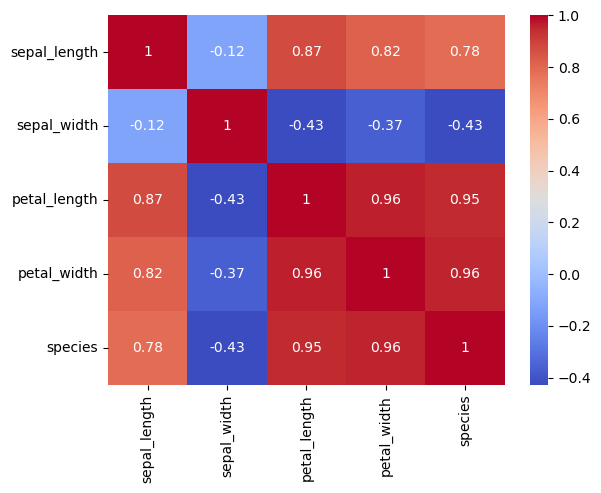

In [7]:
#Korelasyon matrisi
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In [8]:
#train-test split
from sklearn.model_selection import train_test_split
X = df.drop("species", axis = 1)
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
                                                    , random_state=42)

#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [16]:
#Modelleme - Logistic Regression
log_params = dict({
    "penalty": ['l1', 'l2', 'elasticnet'],
    "C" : [0.01, 0.1, 1, 10, 100],
    "solver" : ['lbfgs', 'liblinear', 'saga', 'newton-cg', 'sag', 'newton-cholesky'],
    "max_iter" : [100, 200, 300, 400, 500]
})
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

from sklearn.model_selection import GridSearchCV
log_grid = GridSearchCV(estimator=log_reg, param_grid=log_params, cv= 5)
log_grid.fit(X_train_scaled, y_train)
y_pred_log = log_grid.predict(X_test_scaled)

#En iyi parametreler
print("En iyi parametreler:")
print(log_grid.best_params_)

#Model değerlendirme
from sklearn.metrics import classification_report, confusion_matrix
print("\nModel Değerlendirme:")
print("confusion matrix\n",confusion_matrix(y_test, y_pred_log))
print("\nclassification report\n",classification_report(y_test, y_pred_log))

En iyi parametreler:
{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

Model Değerlendirme:
confusion matrix
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [17]:
#Modelleme - SVM

svc_params = dict({
    "C" : [0.1, 1, 10, 100],
    "kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
    "gamma" : ['scale', 'auto']
})

from sklearn.svm import SVC
svm = SVC()

svc_grid = GridSearchCV(estimator=svm, param_grid=svc_params, cv=5)
svc_grid.fit(X_train_scaled, y_train)
y_pred_svc = svc_grid.predict(X_test_scaled)

#En iyi parametreler
print("En iyi parametreler:")
print(svc_grid.best_params_)

#Model değerlendirme
print("\nModel Değerlendirme:")
print("confusion matrix\n",confusion_matrix(y_test, y_pred_svc))
print("\nclassification report\n",classification_report(y_test, y_pred_svc))

En iyi parametreler:
{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

Model Değerlendirme:
confusion matrix
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [18]:
#Modelleme - Naive Bayes

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

#Model değerlendirme
print("\nModel Değerlendirme:")
print("confusion matrix\n",confusion_matrix(y_test, y_pred_nb))
print("\nclassification report\n",classification_report(y_test, y_pred_nb))



Model Değerlendirme:
confusion matrix
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

